In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
import matplotlib.pyplot as plt

In [15]:
inputNum = 500
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=inputNum, skip_top=10, oov_char=2)

# Create an all-zero matrix of shape (len(sequences), dimension)
# set specific indices of results[i] to 1s
def vectorize_sequences(sequences, dimension=inputNum):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  
    return results
# vectorized training data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(inputNum,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]   

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 6ms/step - loss: 0.5055 - accuracy: 0.7547 - val_loss: 0.4163 - val_accuracy: 0.8184
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8315 - val_loss: 0.3931 - val_accuracy: 0.8266
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8380 - val_loss: 0.3894 - val_accuracy: 0.8281
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8381 - val_loss: 0.4005 - val_accuracy: 0.8202
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8393 - val_loss: 0.3997 - val_accuracy: 0.8183
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.8421 - val_loss: 0.3824 - val_accuracy: 0.8306
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.3453 - accuracy: 0.8468 - val_loss: 0.3871 - val_accuracy: 0.8255
Epoch 8/20
30/30 [==

In [17]:
results = model.evaluate(partial_x_train, partial_y_train)
print ("train:", results)
results = model.evaluate(x_val, y_val)
print ("validation:", results)
results = model.evaluate(x_test, y_test)
print ("all data", results)

history_dict = history.history
print("history dict.keys():", history_dict.keys())

469/469 [==============================] - 0s 618us/step - loss: 0.2013 - accuracy: 0.9177
train: [0.20130343735218048, 0.9177333116531372]
313/313 [==============================] - 0s 638us/step - loss: 0.5495 - accuracy: 0.7980
validation: [0.5494676828384399, 0.7979999780654907]
782/782 [==============================] - 1s 621us/step - loss: 0.5491 - accuracy: 0.7988
all data [0.5491182208061218, 0.798799991607666]
history dict.keys(): dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


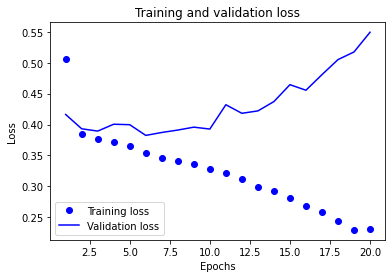

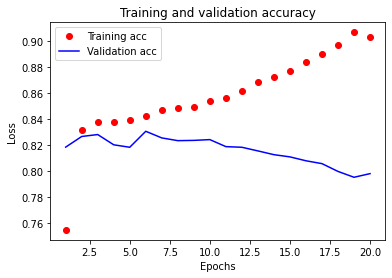

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
fig, ax = plt.subplots()

ax.plot(epochs, loss, 'bo', label='Training loss')
ax.plot(epochs, val_loss, 'b', label='Validation loss')
ax.set(xlabel='Epochs', ylabel='Loss',
       title='Training and validation loss')
ax.legend()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

fig1, ax1 = plt.subplots()
ax1.plot(epochs, acc, 'ro', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set(xlabel='Epochs', ylabel='Loss',
       title='Training and validation accuracy')
ax1.legend()
plt.show()
